ShoeFly.com is performing an A/B Test. They have two different versions of an ad, which they have placed in emails, as well as in banner ads on Facebook, Twitter, and Google. They want to know how the two ads are performing on each of the different platforms on each day of the week.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading and veiwing data

In [2]:
clicks = pd.read_excel('Shoefly AB test.xlsx')

In [3]:
clicks.head()

,user_id,utm_source,day,ad_click_timestamp,group
0,008b7c6c-7272-471e-b90e-930d548bd8d7,google,6 - Saturday,07:18:00,A
1,009abb94-5e14-4b6c-bb1c-4f4df7aa7557,facebook,7 - Sunday,NaN,B
2,00f5d532-ed58-4570-b6d2-768df5f41aed,twitter,2 - Tuesday,NaN,A
3,011adc64-0f44-4fd9-a0bb-f1506d2ad439,google,2 - Tuesday,NaN,B
4,012137e6-7ae7-4649-af68-205b4702169c,facebook,7 - Sunday,NaN,B


In [4]:
clicks.describe() # exploring summary stats

,user_id,utm_source,day,ad_click_timestamp,group
count,1654,1654,1654,565,1654
unique,1654,4,7,464,2
top,6c4759c9-227f-4ba5-a21d-28f913d33cf5,google,5 - Friday,09:18:00,A
freq,1,680,256,4,827


In [5]:
clicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1654 entries, 0 to 1653
Data columns (total 5 columns):
user_id               1654 non-null object
utm_source            1654 non-null object
day                   1654 non-null object
ad_click_timestamp    565 non-null object
group                 1654 non-null object
dtypes: object(5)
memory usage: 64.7+ KB


Null values in `ad_click_timestamp column` means that the ad was not clicked. The data is clean and we can proceed to analysis.

### Clicks by source

In [6]:
# Adding new column is_click to represent whether or not the ad was clicked.
clicks['is_click'] =clicks.ad_click_timestamp.notnull() 

In [7]:
# Statistics by source
total_views = clicks.utm_source.value_counts()
total_clicks = clicks.groupby('utm_source').sum().astype(int)
percentage_clicks= clicks.groupby('utm_source').mean()
clicks_source = pd.concat([total_clicks,total_views,percentage_clicks],axis=1,sort=False) # joining dataframes into one
clicks_source.columns=['total_clicks','total_views','percentage_clicks'] #renaming colum
clicks_source

,total_clicks,total_views,percentage_clicks
email,80,255,0.313725
facebook,180,504,0.357143
google,239,680,0.351471
twitter,66,215,0.306977


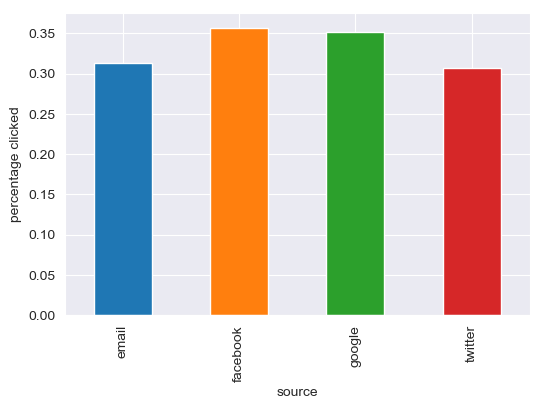

In [8]:
sns.set_style('darkgrid')
fig,ax=plt.subplots(dpi=100)
clicks_source.percentage_clicks.plot(kind='bar',ax=ax)
plt.xlabel('source')
plt.ylabel('percentage clicked')
plt.show()

### Clicks by group

In [9]:
#Viewing the number of people in each experimental group
clicks.group.value_counts()

A    827
B    827
Name: group, dtype: int64

We note that there are same number of people in both experimental groups

In [10]:
clicks.groupby('group').mean() # click % by group

,is_click
group,
A,0.374849
B,0.308343


__Greater % of people clicked ad A which implies that A performed better than B overall__

In [11]:
# Viewing performance by group and source
df = clicks.groupby(['utm_source','group']).mean().reset_index()
df = df.pivot('utm_source','group','is_click')

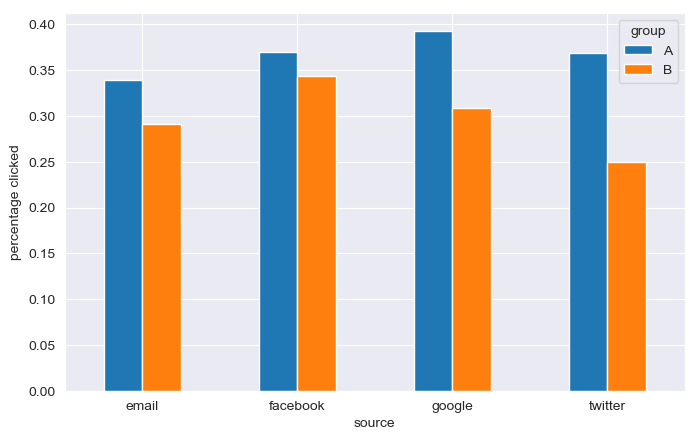

In [12]:
# Visualizing the above table
sns.set_style('darkgrid')
fig,ax=plt.subplots(figsize=(8,5),dpi=100)
df.plot(kind='bar',ax=ax) # bar plot from the pivot table
plt.xlabel('source')
plt.ylabel('percentage clicked')
ax.set_xticklabels(df.index,rotation=0)
plt.show()

**A outperforms B in each source and the gap is higher for google and twitter. Both perform similarly in Fcaebook.**

### Clicks by day of week

In [13]:
click_by_day = clicks.groupby(['day','group']).mean().reset_index() # grouping by day of week and experimental group
click_by_day = click_by_day.pivot('day','group','is_click') #pivoting the data
click_by_day

group,A,B
day,,
1 - Monday,0.380531,0.283186
2 - Tuesday,0.361345,0.378151
3 - Wednesday,0.306452,0.282258
4 - Thursday,0.405172,0.250000
5 - Friday,0.398438,0.296875
6 - Saturday,0.381356,0.355932
7 - Sunday,0.394495,0.311927


In [14]:
# x labels for visualization
xlabels = np.asarray(click_by_day.index)
# stripping of the number for day of week. E.g. changing '1- Monday' to 'Monday'
xlabels = [i.split('-')[1] for i in xlabels]

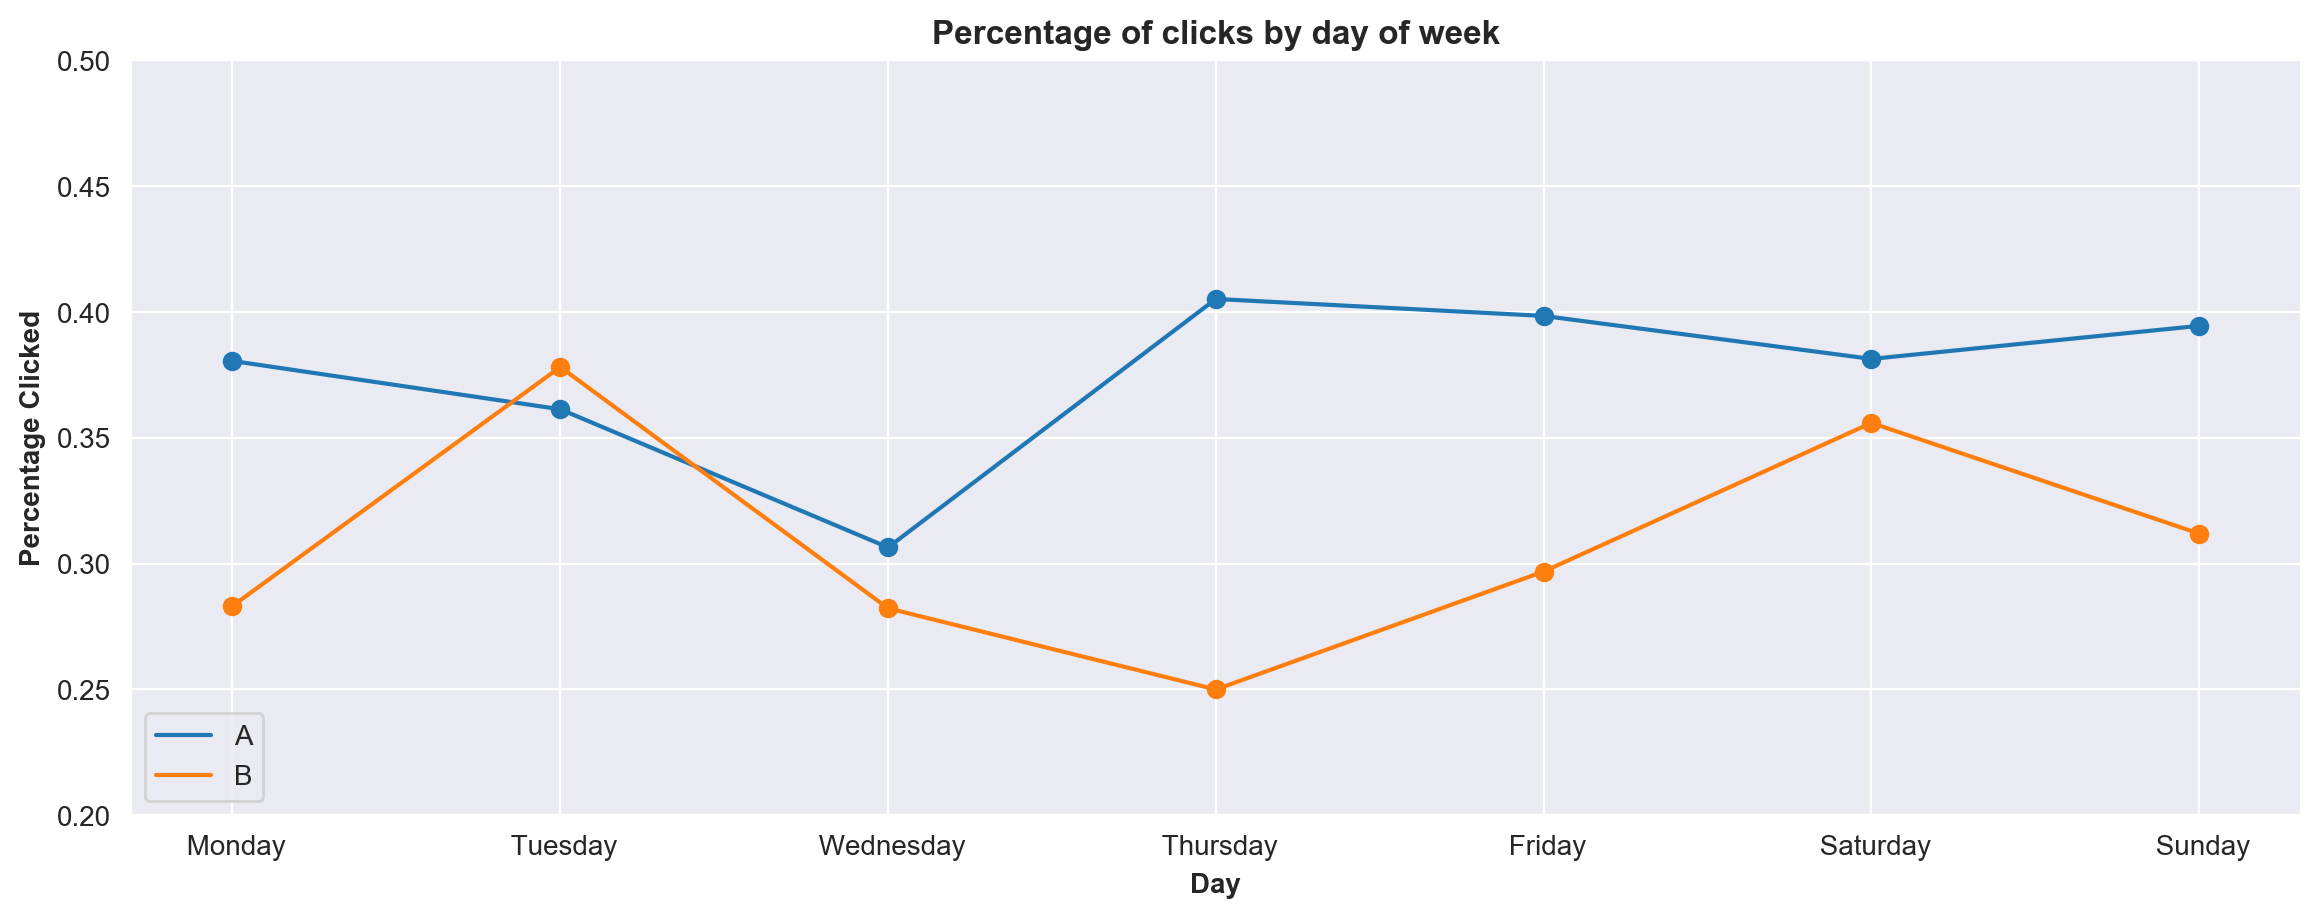

In [15]:
sns.set_style('darkgrid')
plt.figure(figsize=(14,5),dpi=200)
ax=plt.subplot()
# Line plot for % clicks by day of week
click_by_day.plot(kind='line',ax=ax)
# scatter plot for % clicks by day of week
plt.scatter(x=click_by_day.index,y=[click_by_day.A])
plt.scatter(x=click_by_day.index,y=[click_by_day.B])
#plot aesthetics
plt.title('Percentage of clicks by day of week',fontweight='bold')
plt.ylabel('Percentage Clicked',fontweight='bold')
plt.xlabel('Day',fontweight='bold')
plt.legend(loc=3)
ax.set_xticklabels(xlabels)
plt.ylim((0.2,0.5))
plt.show()

We see that Ad A outperforms B on most days. However, Ad B seems to perform better on Tuesday. Howver, before drawing a conclusion, it is important to look at the time frame for the test as it is likely that the result may not be statistically significant. It is also crucial to perform some qualitative analysis to understand why an Ad would perform better on a certain week day. Unfortunately, we don't have the data for this here and is beyond the scope of our analysis. 

### Conclusion

Ad A performs better than Ad B for all sources and most days of the week. The overall click rate of Ad A is 37.5% while Ad B is 31%.Shoefly should proceed with Ad A for all users.